In [1]:
import torch
import numpy as np
import pandas as pd
import pickle
from torchvision import transforms, datasets
from tqdm import tqdm

from networks.resnet_big import SupConResNet

#### Resnet50 SupCon cifar10 batchsize 400

In [3]:
# cifar10
mean = (0.4914, 0.4822, 0.4465)
std = (0.2023, 0.1994, 0.2010)

normalize = transforms.Normalize(mean=mean, std=std)

val_transform = transforms.Compose([
    transforms.ToTensor(),
    normalize,
])

train_dataset = datasets.CIFAR10(root="./datasets/",
                                    transform=val_transform,
                                    download=True)
val_dataset = datasets.CIFAR10(root="./datasets/",
                                train=False,
                                transform=val_transform)

train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=252, shuffle=False,
    num_workers=16, pin_memory=True)
val_loader = torch.utils.data.DataLoader(
    val_dataset, batch_size=256, shuffle=False,
    num_workers=8, pin_memory=True)

Files already downloaded and verified


In [17]:
cuda_device = 2

model = SupConResNet(name="resnet50")


ckpt = torch.load("./save/SupCon/cifar10_models/SupCon_cifar10_resnet50_lr_0.5_decay_0.0001_bsz_400_temp_0.1_trial_0_cosine_warm/ckpt_epoch_300.pth", map_location='cpu')
state_dict = ckpt['model']

new_state_dict = {}
for k, v in state_dict.items():
    k = k.replace("module.", "")
    new_state_dict[k] = v
state_dict = new_state_dict


model = model.cuda(device=cuda_device)

model.load_state_dict(state_dict)

<All keys matched successfully>

##### Train

In [23]:
model = model.cuda(device=cuda_device)

embedding = np.array([])
class_labels = np.array([], dtype=int)

model.eval()

for idx, (images, labels) in enumerate(tqdm(train_loader)):
    
    images = images.cuda(device=cuda_device, non_blocking=True)

    with torch.no_grad():
        features = model.encoder(images)

    embedding = np.append(embedding, features.cpu().numpy().reshape(-1, 2048))
    class_labels = np.append(class_labels, labels.numpy())

model = model.cpu()
embedding = embedding.reshape(-1, 2048)

100%|██████████| 199/199 [02:14<00:00,  1.47it/s]


In [24]:
with open("./save/embeddings/tSNEcuda/embedding_feature", 'wb') as f:
    pickle.dump(embedding, f, protocol=-1)

In [25]:
with open("./save/embeddings/tSNEcuda/embedding_tSNE", 'rb') as f:
    embedding_tSNE = pickle.load(f, encoding='latin1')

<Axes: title={'center': 't-SNE cifar10_train'}, xlabel='x', ylabel='y'>

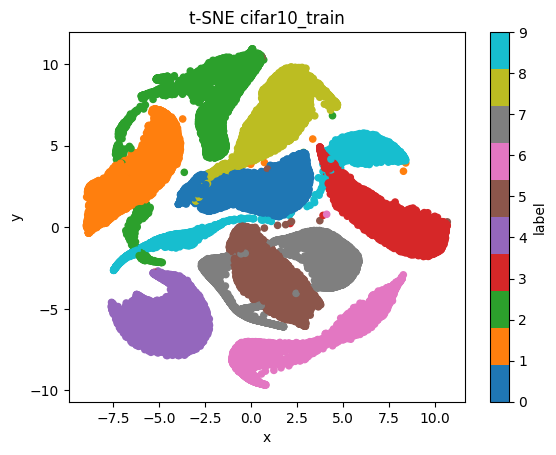

In [26]:
df = pd.DataFrame.from_dict({'x': embedding_tSNE[:,0], 'y': embedding_tSNE[:,1], 'label': class_labels})
df.plot.scatter(x='x', y='y', c='label', colormap='tab10', title="t-SNE cifar10_train")

##### Test

In [18]:
model = model.cuda(device=cuda_device)

embedding = np.array([])
class_labels = np.array([], dtype=int)

model.eval()

for idx, (images, labels) in enumerate(tqdm(val_loader)):
    
    images = images.cuda(device=cuda_device, non_blocking=True)

    with torch.no_grad():
        features = model.encoder(images)

    embedding = np.append(embedding, features.cpu().numpy().reshape(-1, 2048))
    class_labels = np.append(class_labels, labels.numpy())

model = model.cpu()
embedding = embedding.reshape(-1, 2048)

100%|██████████| 40/40 [00:14<00:00,  2.81it/s]


In [19]:
with open("embedding_feature", 'wb') as f:
    pickle.dump(embedding, f, protocol=-1)

In [20]:
with open("embedding_tSNE", 'rb') as f:
    embedding_tSNE = pickle.load(f, encoding='latin1')

<Axes: title={'center': 't-SNE cifar10_test'}, xlabel='x', ylabel='y'>

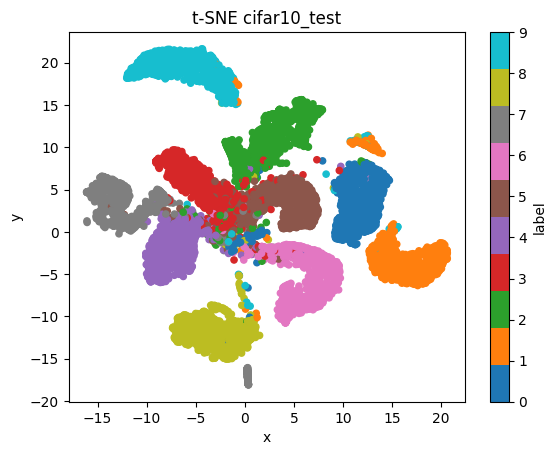

In [22]:
df = pd.DataFrame.from_dict({'x': embedding_tSNE[:,0], 'y': embedding_tSNE[:,1], 'label': class_labels})
df.plot.scatter(x='x', y='y', c='label', colormap='tab10', title="t-SNE cifar10_test")

#### Resnet18 animals10_300x300 batchsize 16

In [2]:
# animals10_300x300
mean = (0.3837, 0.3704, 0.3072)
std = (0.3268, 0.3187, 0.3051)

normalize = transforms.Normalize(mean=mean, std=std)

val_transform = transforms.Compose([
    transforms.ToTensor(),
    normalize,
])

train_dataset = datasets.ImageFolder(root="./datasets/animals10_300x300/train/",
                                    transform=val_transform)

val_dataset = datasets.ImageFolder(root="./datasets/animals10_300x300/test/",
                                    transform=val_transform)

train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=16, shuffle=False,
    num_workers=16, pin_memory=True)
val_loader = torch.utils.data.DataLoader(
    val_dataset, batch_size=16, shuffle=False,
    num_workers=8, pin_memory=True)

In [3]:
cuda_device = 2

model = SupConResNet(name="resnet18")


ckpt = torch.load("./save/SupCon/path_models/SupCon_path_resnet18_lr_0.5_decay_0.0001_bsz_16_temp_0.1_trial_0_cosine/ckpt_epoch_300.pth", map_location='cpu')
state_dict = ckpt['model']

new_state_dict = {}
for k, v in state_dict.items():
    k = k.replace("module.", "")
    new_state_dict[k] = v
state_dict = new_state_dict


model = model.cuda(device=cuda_device)

model.load_state_dict(state_dict)

<All keys matched successfully>

##### Train

In [4]:
model = model.cuda(device=cuda_device)

embedding = np.array([])
class_labels = np.array([], dtype=int)

model.eval()

for idx, (images, labels) in enumerate(tqdm(train_loader)):
    
    images = images.cuda(device=cuda_device, non_blocking=True)

    with torch.no_grad():
        features = model.encoder(images)

    embedding = np.append(embedding, features.cpu().numpy())
    class_labels = np.append(class_labels, labels.numpy())

model = model.cpu()
embedding = embedding.reshape(-1, 512)

100%|██████████| 1309/1309 [05:20<00:00,  4.08it/s]


In [27]:
with open("./save/embeddings/tSNEcuda/embedding_feature", 'wb') as f:
    pickle.dump(embedding, f, protocol=-1)

In [28]:
with open("./save/embeddings/tSNEcuda/embedding_tSNE", 'rb') as f:
    embedding_tSNE = pickle.load(f, encoding='latin1')

<Axes: title={'center': 't-SNE animals10_train'}, xlabel='x', ylabel='y'>

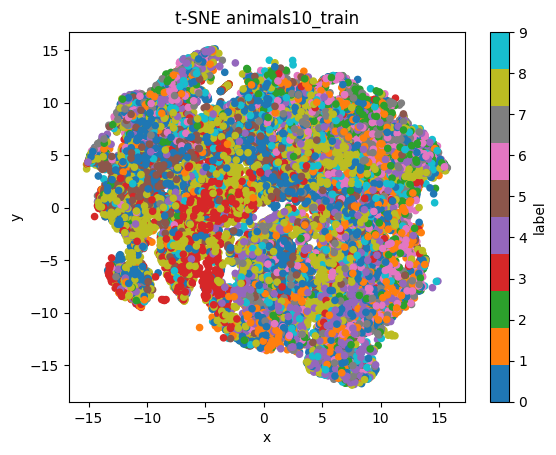

In [29]:
df = pd.DataFrame.from_dict({'x': embedding_tSNE[:,0], 'y': embedding_tSNE[:,1], 'label': class_labels})
df.plot.scatter(x='x', y='y', c='label', colormap='tab10', title="t-SNE animals10_train")

##### Test

In [9]:
model = model.cuda(device=cuda_device)

embedding = np.array([])
class_labels = np.array([], dtype=int)

model.eval()

for idx, (images, labels) in enumerate(tqdm(val_loader)):
    
    images = images.cuda(device=cuda_device, non_blocking=True)

    with torch.no_grad():
        features = model.encoder(images)

    embedding = np.append(embedding, features.cpu().numpy())
    class_labels = np.append(class_labels, labels.numpy())

model = model.cpu()
embedding = embedding.reshape(-1, 512)

100%|██████████| 328/328 [01:05<00:00,  5.04it/s]


In [31]:
with open("embedding_feature", 'wb') as f:
    pickle.dump(embedding, f, protocol=-1)

In [32]:
with open("embedding_tSNE", 'rb') as f:
    embedding_tSNE = pickle.load(f, encoding='latin1')

<Axes: title={'center': 't-SNE animals10_test'}, xlabel='x', ylabel='y'>

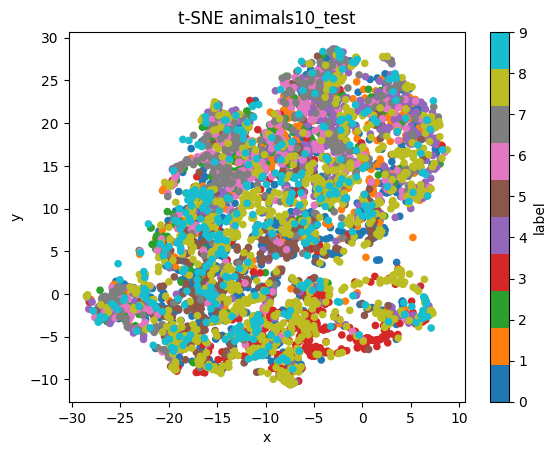

In [33]:
df = pd.DataFrame.from_dict({'x': embedding_tSNE[:,0], 'y': embedding_tSNE[:,1], 'label': class_labels})
df.plot.scatter(x='x', y='y', c='label', colormap='tab10', title="t-SNE animals10_test")

------------

#### Resnet18 animals10_300x300 batchsize 16

##### Train

In [ ]:
entry = {'data': embedding, 'labels': class_labels}
with open("./save/embeddings/animals10/resnet18/embedding_train", 'wb') as f:
    pickle.dump(entry, f, protocol=-1)

In [ ]:
with open("./save/embeddings/animals10/resnet18/embedding_train", 'rb') as f:
    entry_load = pickle.load(f, encoding='latin1')

##### Test

In [11]:
entry = {'data': embedding, 'labels': class_labels}
with open("./save/embeddings/animals10/resnet18/embedding_test", 'wb') as f:
    pickle.dump(entry, f, protocol=-1)

In [12]:
with open("./save/embeddings/animals10/resnet18/embedding_test", 'rb') as f:
    entry_load = pickle.load(f, encoding='latin1')